# Deep Learning - Event Prediction Multi Class Classification Project

## The Data
we'll be using data from the [Kaggle Event Prediction](https://github.com/chang/Allstate-Event-Prediction-Hackathon/tree/master/data). 

## Data
* id: Unique identifier
* timestamp: Global timestamp
* event: Event code (10 total)



This kind of problem is called multi-class classification. It's multi-class because we're trying to predict multiple events.

## 1. Problem Definition
In our case, the problem we will be exploring is **multi classification** (a sample that have multiple classes). 

In a statement,

> Given a sequence of events, can we predict what event is coming next?

## 2. Data

The original data came from the [Kaggle Event Prediction](https://www.kaggle.com/c/allstate-event-prediction-challenge/data)(https://github.com/chang/Allstate-Event-Prediction-Hackathon/tree/master/data).

unfortunately, the data is not found on Kaggle anymore. Howevever, we've downloaded from [Github](https://github.com/chang/Allstate-Event-Prediction-Hackathon/tree/master/data).

The original database contains 3 attributes, **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.


## 3. Evaluation

In a statement,

> The evaluation metric is Multiclass Log-loss. A lower score indicates better performance.

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

### All state Event Data Dictionary

* id: Unique identifier
* timestamp: Global timestamp
* event: Event code (10 total)

## 5. Modelling


## Getting our workspace ready

Before we get started, since we'll be using TensorFlow 2.x, let's import them.

**NOTE:** Do not run the cell underneath
if you already use TF 2.x.
Running this notebook on the Google Colab is recommended
because they support GPU that makes our model train faster. 

In [ ]:
# Import TF 2.x
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

Let's run some import statements. And check whether or not we're using a GPU.

In [ ]:
import tensorflow as tf

print("TF version:", tf.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.2.0
GPU available (YESS!!!!)


Importing the Useful libraries

In [ ]:
# Regular Explorartory Data Analysis(EDA) and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

# Libraries for Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

# For Making our Neural Network Layers and Models
from keras.layers.embeddings import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,SpatialDropout1D,Dropout,SimpleRNN

# Callback
from tensorflow.keras.callbacks import EarlyStopping

# Misc. Libraries
import os, datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


## Load Data

**Note**: Please set the path where your ```train.csv``` is
located if the cell below is giving an error. 

In [ ]:
# reading the train.csv file into the Dataframe
df = pd.read_csv('/content/drive/My Drive/EventPrediction/train.csv')

In [ ]:
df.head()

,id,timestamp,event
0,00005408fb82819bf6eef036180ce1d28ca64ac4553788...,1,36003
1,00005408fb82819bf6eef036180ce1d28ca64ac4553788...,2,36003
2,00005408fb82819bf6eef036180ce1d28ca64ac4553788...,3,30018
3,00005408fb82819bf6eef036180ce1d28ca64ac4553788...,4,36003
4,000061e45fb216f4ad7fbc0cd86f620441a3091005eeb6...,5,30021


## Data Exploration (exploratory data analysis or EDA)

Let's check out the Total Number of classes or events do we have.

In [ ]:
# Displaying different classes
df.event.value_counts()

30018    262403
30021    258178
36003    252137
30024    113500
30027    101509
30039     45249
30042     42273
45003     25706
30045     14497
30048      6555
Name: event, dtype: int64

Hmm, that is hideous let's use
the ```matplotlib``` to visually see them.
This plot shows how many
times each of the events happens.

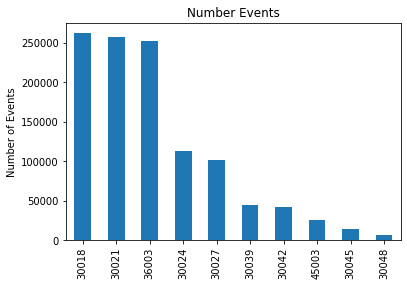

In [ ]:
# Making the bar plot
df['event'].value_counts().sort_values(ascending=False).plot(kind='bar')
# Setting the ylabel
plt.ylabel('Number of Events') 
# Setting the Title
plt.title('Number Events');

Hmm, now we see the number of events
clearly, let's test the plot on the distribution now.
Once its graphed, the data is organized in a series
to display how the points are spread around the series.
Such distributions demonstrate the distribution
of the data (dispersion, variability, scatter). 

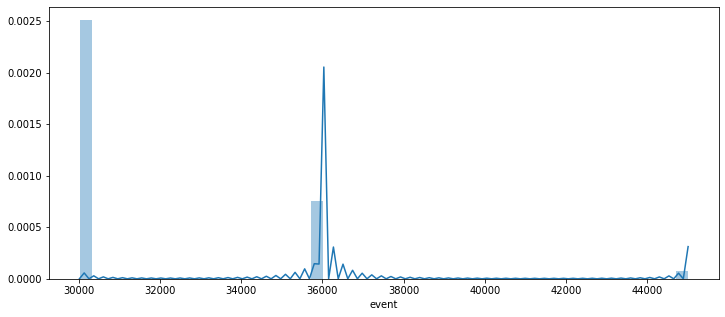

In [ ]:
# Setting the plot size
plt.figure(figsize=(12, 5))
sns.distplot(df['event'])

We conclude that our data is not sufficient enough
to know and forecast events by looking at the distributions.


But, again recalling that we need to test our model of deep learning on **Multi-Class Loss Metric** means that a lower score indicates that we are close to our achievement. 

Countplot shows the counts of events in each categorical bin using bars.

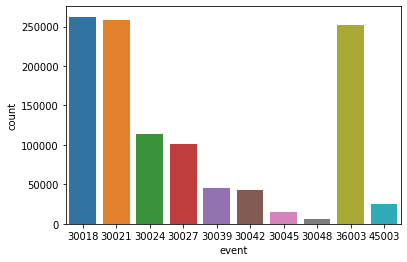

In [ ]:
sns.countplot(x='event',data=df)

Using seaborn let's show
the entire data frame.
A pairplot displays the pairwise
relationships in a dataset. 

<Figure size 864x576 with 0 Axes>

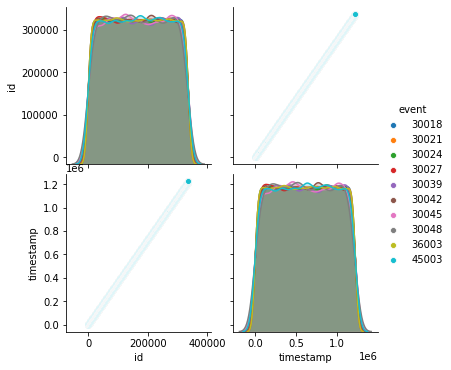

In [ ]:
plt.figure(figsize=(12,8))
sns.pairplot(df,hue="event")

In [ ]:
# calculating some statistical data like percentile, mean and std of the numerical values
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timestamp,1122007.0,611470.464094,353053.760884,1.0,305591.5,611506.0,917257.5,1222877.0
event,1122007.0,31710.651044,3213.895816,30018.0,30021.0,30024.0,30048.0,45003.0


### Correlation between independent variables

Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using `df.corr()` which will create a [**correlation matrix**]

In [ ]:
df.corr()

,timestamp,event
timestamp,1.000000,-0.000211
event,-0.000211,1.000000


Let's see visually

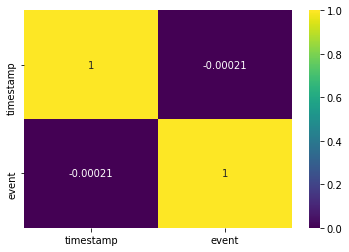

In [ ]:
#  Let's make it look a little prettier
sns.heatmap(df.corr(),annot=True,cmap='viridis')

Let's check the values of dataframe to see what we have.

In [ ]:
# Example function
def print_plot(index):
  """
  Example function to Display the Dataframe Data of every index.
  """
  example = df[df.index == index][['id','timestamp', 'event']].values[0]
  if len(example) > 0:
    print('id:',example[0])
    print('Timestamp:',example[1])
    print('Event:', example[2])
print_plot(10)

id: 0000b953a8b26886a7086673d8d1b7bd78efe139775728544a3cee2e7cf95a27
Timestamp: 11
Event: 30027


Or more visuallly,

In [ ]:
# Display first 5 rows
df.head()

,id,timestamp,event
0,00005408fb82819bf6eef036180ce1d28ca64ac4553788...,1,36003
1,00005408fb82819bf6eef036180ce1d28ca64ac4553788...,2,36003
2,00005408fb82819bf6eef036180ce1d28ca64ac4553788...,3,30018
3,00005408fb82819bf6eef036180ce1d28ca64ac4553788...,4,36003
4,000061e45fb216f4ad7fbc0cd86f620441a3091005eeb6...,5,30021


Hmm, Let's see the little bit information about our Dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122007 entries, 0 to 1122006
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   id         1122007 non-null  object
 1   timestamp  1122007 non-null  int64 
 2   event      1122007 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 25.7+ MB


oohhhh! so we have a huge collection of Data about ```11,220,07``` rows and 3 columns:

* ```id``` (string)
* ```timestamp``` (integer)
* ```event``` (integer)

Let's make a slider to set the number of data ```NUM_DATA``` to use for our experiment.

We train on the small data if it works on it it wil definitly work on the big data but take a lot more GPU power and our precious time.

So, lets now work on 100,000 rows.

In [ ]:
# Set number of DATA to use for experimenting
NUM_DATA = 100000 #@param {type:"slider", min:1000, max:1122007, step:1000}
NUM_DATA

100000

In [ ]:
# We define another temporary dataframe to work on it so we dont't have to mess with the original data
df_tmp = df[:NUM_DATA]

## Data Preprocessing

Alright, enough Data Analysis now let's preprocess our Data to make it ready for our NN model.

Let's check the datatypes of each column.

In [ ]:
# Data types of each column
df_tmp.dtypes

id           object
timestamp     int64
event         int64
dtype: object

So, we see that an ```id``` column have the string data type. As we know that a machine learning model will train on the numerical data. so we have to convert it into numerical form. 

There are many ways to turn our data into numerical.

let's use the Vectorization method to **Vectorize** it so we can train it on our model later on. 

In verctorization method, we convert the series of words into numbers later on we pass these integers in the Embedding layer of our Neural Network Model.

**Embedding Layer Functionality**: 
Turns positive integers (indexes) into dense vectors of fixed size.

e.g. [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]

This layer can only be used as the first layer in a model.

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = NUM_DATA

# This is fixed for our Embedding Layer in NN model
EMBEDDING_DIM = 100
# Instantiate our tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NB_WORDS)
# Fitting it on our id
tokenizer.fit_on_texts(df_tmp['id'].values)
# Finding the number words
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 30035 unique tokens.


In [ ]:
# Change text to sequences
encoded_id = tokenizer.texts_to_sequences(df_tmp['id'].values)
# padding sequences
encoded_id = tf.keras.preprocessing.sequence.pad_sequences(encoded_id)
print('Shape of data tensor:', encoded_id.shape)

Shape of data tensor: (100000, 1)


In [ ]:
# converted strings
encoded_id[:10]

array([[3570],
       [3570],
       [3570],
       [3570],
       [9263],
       [9263],
       [9263],
       [9264],
       [9264],
       [9264]], dtype=int32)

Now our ```id``` is changes into the intergers

In [ ]:
X = encoded_id
print('Shape of label tensor:', X.shape)

Shape of label tensor: (100000, 1)


One Hot encoding for our Events

for e.g,

![One Hot encoding Example](https://naadispeaks.files.wordpress.com/2018/04/mtimfxh.png?w=471&h=151)


In [ ]:
# OneHot Encoding
pd.get_dummies(df_tmp['event'])

,30018,30021,30024,30027,30039,30042,30045,30048,36003,45003
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,1,0,0,0,0,0,0,0,0,0
99996,1,0,0,0,0,0,0,0,0,0
99997,0,1,0,0,0,0,0,0,0,0
99998,0,0,0,1,0,0,0,0,0,0


In [ ]:
Y = pd.get_dummies(df_tmp['event']).values
print('Shape of feature tensor:', Y.shape)

Shape of feature tensor: (100000, 10)


In [ ]:
Y[:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

## Splitting the X and Y into training and validation datasets.

We can manually split the data into training and validation sets but let's use the **Sci-kit Learn** Method ```train_test_split()``` to help us.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X[:NUM_DATA],Y[:NUM_DATA], test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)

(90000, 1) (90000, 10)
(10000, 1) (10000, 10)


## Scalling our Data

We have to scale our data so our model could'not cheat. It will scale our numerical value between 0 ~ 1.

In [ ]:
# Instantiate Scaler
scaler = MinMaxScaler()
# Fit on train data
scaler.fit(X_train)
# Transform on train and validation data
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

## Creating a Model

We use the Deep Learning **Recurrent Neural Network (RNN)** technique on our model.

We can do it by using the Tensorflow Keras API.

Build a model in a Sequential Order and add the required layers:

* Create a Sequential Model
* Add an Embedding Layer (Input Layer)
* Add an SimpleRNN Layer (Hidden Layers)
* Add a Dense Layer (Final Output Layer)

Let's build it,

In [ ]:
model = Sequential()
# Embedding Layer
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM, input_length=X_train.shape[1]))
# RNN Layer
model.add(SimpleRNN(100))
# Final Dense Layer  (using softmax for Multi-Class Classification Problem)
model.add(Dense(10, activation='softmax'))

# Finally Compile the Model
model.compile(loss='categorical_crossentropy', # loss function for multi-classification
              optimizer='adam') # optimizer

# Number of Epochs
epochs = 5
# Batch size
batch_size = 64

If you are not sure what Epoc is, Its very simple. It means that how many times our model go through over the data during its training time.

Create an Early stopping to stop our training process if our model stops improving.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3,verbose=1)

In [ ]:
# Display the Layers Information of our model
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 1, 100)            10000000  
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100)               20100     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 10,021,110
Trainable params: 10,021,110
Non-trainable params: 0
_________________________________________________________________


Train our model with training datasets.

In [ ]:
history = model.fit(X_train, # Train data
                    Y_train,
                    epochs=epochs, # epochs
                    batch_size=batch_size, # batch size
                    validation_data=(X_val,Y_val), # validation data
                    callbacks=[early_stop]) # callback

Epoch 1/5
1407/1407 [==============================] - 134s 95ms/step - loss: 1.8920 - val_loss: 2.0218
Epoch 2/5
1407/1407 [==============================] - 136s 97ms/step - loss: 1.8920 - val_loss: 1.9802
Epoch 3/5
1407/1407 [==============================] - 136s 97ms/step - loss: 1.8916 - val_loss: 1.9514
Epoch 4/5
1407/1407 [==============================] - 138s 98ms/step - loss: 1.8914 - val_loss: 1.9303
Epoch 5/5
1407/1407 [==============================] - 139s 98ms/step - loss: 1.8913 - val_loss: 1.9143


Great, we trained our model and get the **MultiClass Loss** Value 1.89. The more it smaller the more it better for us.

Let's Plot the losses to see the trend between train and validation loss using matplotlib.

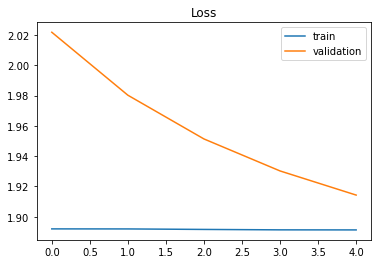

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

It takes a lot of time to train the model let's create the helping functions for us to save and load the model mo we don't need to train again and again.

In [ ]:
# defining the save model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("/content/drive/My Drive/EventPrediction/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

# defining the load model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path)
  return model

**Note**: Please set the path where your want to save your model.

In [ ]:
# Save our trained model based on Full Data
save_model(model, suffix="100,000-SimpleRNN-modelv1")

Saving model to: /content/drive/My Drive/EventPrediction/models/20200724-13481595598512-100,000-SimpleRNN-modelv1.h5...


'/content/drive/My Drive/EventPrediction/models/20200724-13481595598512-100,000-SimpleRNN-modelv1.h5'

**Note**: Please set the path where your ```model``` is
located if the cell below is giving an error. 

In [ ]:
# load our saved trained model based on Full Data
loaded_rnn_model = load_model('/content/drive/My Drive/EventPrediction/models/20200724-13481595598512-100,000-SimpleRNN-modelv1.h5')

Loading saved model from: /content/drive/My Drive/EventPrediction/models/20200724-13481595598512-100,000-SimpleRNN-modelv1.h5


## Evaluation

The statements,

>The evaluation metric is Multiclass Log-loss. A lower score indicates better performance.


In [ ]:
# Evaluating the MultiClass Loss for Validation Model
accr = model.evaluate(X_val,Y_val)
print('Test set\nMulti-Class Loss: {:.2f}'.format(accr))

313/313 [==============================] - 1s 2ms/step - loss: 1.9143
Test set
Multi-Class Loss: 1.91


In [ ]:
# change events to numpy array
events = df_tmp["event"].to_numpy() # convert labels column to NumPy array

In [ ]:
# Find the unique label values
unique_events = np.unique(events)
unique_events

array([30018, 30021, 30024, 30027, 30039, 30042, 30045, 30048, 36003,
       45003])

Let's make some predictions.

In [ ]:
preds = model.predict(X_val) # Predicted Values
true_preds = Y_val # True Values

In [ ]:
print("Predicted Event: ",unique_events[np.argmax(predictions[0])])

print("Actual Event: ",unique_events[np.argmax(true_preds[0])])

Predicted Event:  30021
Actual Event:  30024


## Tuning the Model
Let's try to improve the model to train on different model and tune the hyperparameter to improve our loss.

![Spatial Dropout](https://i.stack.imgur.com/JhWOk.jpg)

In [ ]:
# Add a Sequention Model
model = Sequential()
# Embedded layer
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM, input_length=X_train.shape[1]))
# Sapatial Dropout
model.add(SpatialDropout1D(0.2))
# LSTM NN Layer
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# Final output layer
model.add(Dense(10, activation='softmax')) # using the softmax for multiclass classification

model.compile(loss='categorical_crossentropy', # using the categorical_crossentropy for multiclass classification
              optimizer='adam')

epochs = 5 # Epocs
batch_size = 64 # Batch size

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 1, 100)            10000000  
_________________________________________________________________
spatial_dropout1d_11 (Spatia (None, 1, 100)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 10,081,410
Trainable params: 10,081,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, # Train data
                    Y_train,
                    epochs=epochs, #Epochs
                    batch_size=batch_size, # Batch size
                    validation_data=(X_val,Y_val), # Validation data
                    callbacks=[early_stop]) # Early stop callback

Epoch 1/5
1407/1407 [==============================] - 147s 104ms/step - loss: 1.9031 - val_loss: 2.1466
Epoch 2/5
1407/1407 [==============================] - 145s 103ms/step - loss: 1.8925 - val_loss: 2.0941
Epoch 3/5
1407/1407 [==============================] - 143s 102ms/step - loss: 1.8919 - val_loss: 2.0560
Epoch 4/5
1407/1407 [==============================] - 142s 101ms/step - loss: 1.8919 - val_loss: 2.0173
Epoch 5/5
1407/1407 [==============================] - 142s 101ms/step - loss: 1.8915 - val_loss: 1.9916


In [ ]:
# Save our trained model based on Full Data
save_model(model, suffix="100,000-LSTM-modelv1")

Saving model to: /content/drive/My Drive/EventPrediction/models/20200724-15501595605811-100,000-LSTM-modelv1.h5...


'/content/drive/My Drive/EventPrediction/models/20200724-15501595605811-100,000-LSTM-modelv1.h5'

In [ ]:
# load our trained model based on Full Data
loaded_lstm_model = load_model('/content/drive/My Drive/EventPrediction/models/20200724-15501595605811-100,000-LSTM-modelv1.h5')

Loading saved model from: /content/drive/My Drive/EventPrediction/models/20200724-15501595605811-100,000-LSTM-modelv1.h5


Let's Plot the losses to see the trend between train and validation loss using matplotlib.

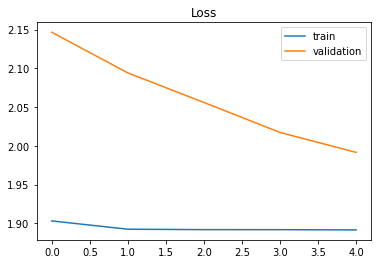

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

Not improved because the data is not related and have very less features so we stick with this score 1.89.

## Testing

**Note**: Please set the path where your ```test.csv``` is
located if the cell below is giving an error. 

In [ ]:
# reading the tese.csv file into the Dataframe
test_df = pd.read_csv('/content/drive/My Drive/EventPrediction/test.csv')

In [ ]:
test_df.head()

,id
0,0001da55d168196bf25f06a497b5cf414126542f4d357d...
1,00024eca1053d4268df5c6d3308f0d008cf5e2678c443f...
2,000273e55809afd4a9ac4fb9175effe5d0ea449ed37e7c...
3,0002bd1d73c326ad6e337a5687f6787b055f13079d5c52...
4,00030b6d5b8013bcb9bb23a9bccf394d7b361a01d0d6b7...


So, we have and ```id``` column which is in string. Let's make a helper function to preprocess our data same as we done it before to train our model.

In [ ]:
def preprocess_data(df, num_data=None):
  """
  A simple function which convert id columns to number sequence
  """
  if num_data == None:
    num_data = len(df)
  df_tmp = df[:num_data]
  # The maximum number of words to be used. (most frequent)
  MAX_NB_WORDS = 100000

  # Instantiate our tokenizer
  tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NB_WORDS)
  # Fitting it on our id
  tokenizer.fit_on_texts(df_tmp['id'].values)
  # Finding the number words
  word_index = tokenizer.word_index
  # Change text to sequences
  encoded_id = tokenizer.texts_to_sequences(df_tmp['id'].values)
  # padding sequences
  encoded_id = tf.keras.preprocessing.sequence.pad_sequences(encoded_id)
  return encoded_id

In [ ]:
X_test = preprocess_data(test_df)

In [ ]:
X_test[:10]

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int32)

Let's makes some predictions

In [ ]:
predictions = loaded_rnn_model.predict(X_test)

In [ ]:
predictions[:10]

array([[0.22358243, 0.24370061, 0.10140859, 0.08916586, 0.03770697,
        0.03349097, 0.00830176, 0.0035798 , 0.24032682, 0.0187362 ],
       [0.19767581, 0.20190915, 0.10460997, 0.10484879, 0.05958105,
        0.05401779, 0.02396404, 0.0154005 , 0.20107365, 0.03691924],
       [0.20082964, 0.20777397, 0.10216384, 0.10215017, 0.05625179,
        0.05403346, 0.02209961, 0.01223978, 0.20780057, 0.03465723],
       [0.20142159, 0.21113177, 0.10485921, 0.10220353, 0.05578636,
        0.05028578, 0.02107717, 0.01316829, 0.20708248, 0.03298377],
       [0.20102775, 0.20209543, 0.10516629, 0.10263883, 0.05712081,
        0.05719672, 0.02357156, 0.0133609 , 0.20164736, 0.03617441],
       [0.19917983, 0.20490351, 0.10410406, 0.10286229, 0.05848415,
        0.05497725, 0.02282517, 0.01427198, 0.20191336, 0.03647841],
       [0.19560139, 0.20321597, 0.10674561, 0.10440515, 0.05958178,
        0.0562414 , 0.02300559, 0.0153242 , 0.19814712, 0.03773185],
       [0.19292329, 0.19803753, 0.1075343

Let's put these predictions in the dataframe.

In [ ]:
column_names = ['"event_' + str(name) + '"' for name in unique_events]

In [ ]:
submission = pd.DataFrame(test_df['id'], columns=['id'] +  list(column_names))
submission

,id,"""event_30018""","""event_30021""","""event_30024""","""event_30027""","""event_30039""","""event_30042""","""event_30045""","""event_30048""","""event_36003""","""event_45003"""
0,0001da55d168196bf25f06a497b5cf414126542f4d357d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00024eca1053d4268df5c6d3308f0d008cf5e2678c443f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000273e55809afd4a9ac4fb9175effe5d0ea449ed37e7c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0002bd1d73c326ad6e337a5687f6787b055f13079d5c52...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00030b6d5b8013bcb9bb23a9bccf394d7b361a01d0d6b7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
100865,fffdc36a3362aea6217598bcd05dad12fe425709af0837...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100866,fffe08c56ff7b96b2c6602ddf2ffdd7ef151ae42836f14...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100867,fffec7db7e3ef648450cef467d8c5e6ca29f2f70cb1b92...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100868,ffff88c2041f637a2ab5f100c3a614a742f4d5956819c6...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
submission[column_names] = predictions

In [ ]:
submission.head()

,id,"""event_30018""","""event_30021""","""event_30024""","""event_30027""","""event_30039""","""event_30042""","""event_30045""","""event_30048""","""event_36003""","""event_45003"""
0,0001da55d168196bf25f06a497b5cf414126542f4d357d...,0.223582,0.243701,0.101409,0.0891659,0.037707,0.033491,0.00830176,0.0035798,0.240327,0.0187362
1,00024eca1053d4268df5c6d3308f0d008cf5e2678c443f...,0.197676,0.201909,0.10461,0.104849,0.059581,0.0540178,0.023964,0.0154005,0.201074,0.0369192
2,000273e55809afd4a9ac4fb9175effe5d0ea449ed37e7c...,0.20083,0.207774,0.102164,0.10215,0.0562518,0.0540335,0.0220996,0.0122398,0.207801,0.0346572
3,0002bd1d73c326ad6e337a5687f6787b055f13079d5c52...,0.201422,0.211132,0.104859,0.102204,0.0557864,0.0502858,0.0210772,0.0131683,0.207082,0.0329838
4,00030b6d5b8013bcb9bb23a9bccf394d7b361a01d0d6b7...,0.201028,0.202095,0.105166,0.102639,0.0571208,0.0571967,0.0235716,0.0133609,0.201647,0.0361744


**Note**: Please set the path where your want to save your ```submission.csv```

In [ ]:
submission.to_csv('/content/drive/My Drive/EventPrediction/submission/submission.csv',index=False)